In [3]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pylab as plt

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 50)

# data load & 전처리

### train data

In [4]:
df_train = pd.read_csv('./data/act_train.csv', parse_dates=['date'])
df_people = pd.read_csv('./data/people.csv', parse_dates=['date'])
df_merge = pd.merge(df_train, df_people, on='people_id')

In [5]:
df_date_x = df_merge['date_x'].copy()
df_date_y = df_merge['date_y'].copy()

In [6]:
df_merge.drop(['date_x', 'date_y'], axis=1, inplace=True)

In [7]:
idx1 = df_merge.activity_id[df_merge.activity_id.str.contains('^act1')].index
idx2 = df_merge.activity_id[df_merge.activity_id.str.contains('^act2')].index
df_merge.activity_id.loc[idx1] = 1
df_merge.activity_id.loc[idx2] = 2

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [8]:
df_merge = df_merge.replace('type ', '', regex=True).apply(pd.to_numeric, errors='ignore')

##### add Past days, week

In [11]:
df_merge.insert(loc=2 ,column='date_x', value=df_date_x)
# df_merge.insert(loc=3 ,column='Past days_x', value=(df_merge['date_x'] - pd._libs.tslib.Timestamp('2022-07-17 00:00:00')))
df_merge.insert(loc=3 ,column='week_x', value=df_merge['date_x'].dt.weekday)
# df_merge.insert(loc=3 ,column='date_year_x', value=df_date_x.dt.year)
# df_merge.insert(loc=4 ,column='date_month_x', value=df_date_x.dt.month)
# df_merge.insert(loc=5 ,column='date_day_x', value=df_date_x.dt.day)
# df_merge['Past days_x']=(pd.to_numeric(df_merge['Past days_x'])/86400000000000).astype(int)

df_merge.insert(loc=18 ,column='date_y', value=df_date_y)
# df_merge.insert(loc=19 ,column='Past days_y', value=(df_merge['date_y'] - pd._libs.tslib.Timestamp('2020-05-18 00:00:00')))
df_merge.insert(loc=19 ,column='week_y', value=df_merge['date_y'].dt.weekday)
# df_merge.insert(loc=19 ,column='date_year_y', value=df_date_y.dt.year)
# df_merge.insert(loc=20 ,column='date_month_y', value=df_date_y.dt.month)
# df_merge.insert(loc=21 ,column='date_day_y', value=df_date_y.dt.day)
# df_merge['Past days_y']=(pd.to_numeric(df_merge['Past days_y'])/86400000000000).astype(int)

df_merge.insert(loc=4 ,column='Past days', value=(df_merge.date_x - df_merge.date_y).astype('timedelta64[D]'))

ValueError: cannot insert date_x, already exists

### test data

In [ ]:
# df_test = pd.read_csv('./data/act_test.csv', parse_dates=['date'])
# df_merge_test = pd.merge(df_test, df_people, how='inner', on='people_id')
# df_date_x_test = df_merge_test['date_x'].copy()
# df_date_y_test = df_merge_test['date_y'].copy()

# df_merge_test.drop(['date_x', 'date_y'], axis=1, inplace=True)

# df_merge_test = df_merge_test.replace('type ', '', regex=True).apply(pd.to_numeric, errors='ignore')

# idx1_test = df_merge_test.activity_id[df_merge_test.activity_id.str.contains('^act1')].index
# idx2_test = df_merge_test.activity_id[df_merge_test.activity_id.str.contains('^act2')].index
# df_merge_test.activity_id.loc[idx1_test] = 1
# df_merge_test.activity_id.loc[idx2_test] = 2

# df_merge_test.insert(loc=2 ,column='date_x', value=df_date_x_test)
# # df_merge_test.insert(loc=3 ,column='Past days_x', value=(df_merge_test['date_x'] - pd._libs.tslib.Timestamp('2022-07-17 00:00:00')))
# df_merge_test.insert(loc=3 ,column='week_x', value=df_merge_test['date_x'].dt.weekday)
# # df_merge_test.insert(loc=3 ,column='date_year_x', value=df_date_x_test.dt.year)
# # df_merge_test.insert(loc=4 ,column='date_month_x', value=df_date_x_test.dt.month)
# # df_merge_test.insert(loc=5 ,column='date_day_x', value=df_date_x_test.dt.day)

# df_merge_test.insert(loc=18 ,column='date_y', value=df_date_y_test)
# # df_merge_test.insert(loc=19 ,column='Past days_y', value=(df_merge_test['date_y'] - pd._libs.tslib.Timestamp('2020-05-18 00:00:00')))
# df_merge_test.insert(loc=19 ,column='week_y', value=df_merge_test['date_y'].dt.weekday)
# # df_merge_test.insert(loc=19 ,column='date_year_y', value=df_date_y_test.dt.year)
# # df_merge_test.insert(loc=20 ,column='date_month_y', value=df_date_y_test.dt.month)
# # df_merge_test.insert(loc=21 ,column='date_day_y', value=df_date_y_test.dt.day)
# df_merge_test['past days'] = (df_merge_test.date_x - df_merge_test.date_y).astype('timedelta64[D]')

In [20]:
del df_train, df_people, df_date_x, df_date_y, idx1, idx2
# del df_test, df_date_x_test, df_date_y_test, idx1_test, idx2_test

In [ ]:
# df_merge.to_csv("train_merge.csv")

In [ ]:
# df_merge = pd.read_csv('./train_merge.csv', parse_dates=['date_x', 'date_y'])

In [59]:
df_merge.head()

,people_id,activity_id,date_x,week_x,Past days,activity_category,char_1_x,char_2_x,char_3_x,char_4_x,char_5_x,char_6_x,char_7_x,char_8_x,char_9_x,char_10_x,outcome,char_1_y,group_1,date_y,week_y,char_2_y,char_3_y,char_4_y,char_5_y,char_6_y,char_7_y,char_8_y,char_9_y,char_10_y,char_11,char_12,char_13,char_14,char_15,char_16,char_17,char_18,char_19,char_20,char_21,char_22,char_23,char_24,char_25,char_26,char_27,char_28,char_29,char_30,char_31,char_32,char_33,char_34,char_35,char_36,char_37,char_38
0,ppl_100,2,2023-08-26,5,788.0,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,76.0,0,2,group 17304,2021-06-29,1,2,5,5,5,3,11,2,2,True,False,False,True,True,False,True,False,False,False,False,True,False,False,False,False,False,True,True,False,True,True,False,False,True,True,True,False,36
1,ppl_100,2,2022-09-27,1,455.0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0,2,group 17304,2021-06-29,1,2,5,5,5,3,11,2,2,True,False,False,True,True,False,True,False,False,False,False,True,False,False,False,False,False,True,True,False,True,True,False,False,True,True,True,False,36
2,ppl_100,2,2022-09-27,1,455.0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0,2,group 17304,2021-06-29,1,2,5,5,5,3,11,2,2,True,False,False,True,True,False,True,False,False,False,False,True,False,False,False,False,False,True,True,False,True,True,False,False,True,True,True,False,36
3,ppl_100,2,2023-08-04,4,766.0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0,2,group 17304,2021-06-29,1,2,5,5,5,3,11,2,2,True,False,False,True,True,False,True,False,False,False,False,True,False,False,False,False,False,True,True,False,True,True,False,False,True,True,True,False,36
4,ppl_100,2,2023-08-26,5,788.0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0,2,group 17304,2021-06-29,1,2,5,5,5,3,11,2,2,True,False,False,True,True,False,True,False,False,False,False,True,False,False,False,False,False,True,True,False,True,True,False,False,True,True,True,False,36


# EDA

In [24]:
for d in ['date_x', 'date_y']:
    print('Start of ' + d + ': ' + str(df_merge[d].min().date()))
    print('  End of ' + d + ': ' + str(df_merge[d].max().date()))
    print('Range of ' + d + ': ' + str(df_merge[d].max() - df_merge[d].min()) + '\n')

Start of date_x: 2022-07-17
  End of date_x: 2023-08-31
Range of date_x: 410 days 00:00:00

Start of date_y: 2020-05-18
  End of date_y: 2023-08-31
Range of date_y: 1200 days 00:00:00



In [58]:
df_merge.describe()

,activity_id,week_x,Past days,activity_category,char_1_x,char_2_x,char_3_x,char_4_x,char_5_x,char_6_x,char_7_x,char_8_x,char_9_x,char_10_x,outcome,char_1_y,week_y,char_2_y,char_3_y,char_4_y,char_5_y,char_6_y,char_7_y,char_8_y,char_9_y,char_38
count,2.197291e+06,2.197291e+06,2.197291e+06,2.197291e+06,157615.000000,157615.000000,157615.000000,157615.000000,157615.000000,157615.000000,157615.000000,157615.000000,157615.000000,2.039676e+06,2.197291e+06,2.197291e+06,2.197291e+06,2.197291e+06,2.197291e+06,2.197291e+06,2.197291e+06,2.197291e+06,2.197291e+06,2.197291e+06,2.197291e+06,2.197291e+06
mean,1.928268e+00,3.231972e+00,2.593235e+02,2.997433e+00,6.932449,5.188389,3.932145,2.799023,3.579881,2.010443,2.554275,5.275538,7.200761,5.038379e+02,4.439544e-01,1.906321e+00,3.142312e+00,2.448956e+00,1.786501e+01,1.223861e+01,5.760739e+00,2.744043e+00,1.077467e+01,3.093629e+00,3.476141e+00,4.998051e+01
std,2.580429e-01,1.558017e+00,2.748091e+02,1.314068e+00,6.923220,4.769402,2.150886,1.060304,2.261971,0.815512,1.575641,3.036524,4.936222,1.202242e+03,4.968491e-01,2.913810e-01,1.528937e+00,6.593571e-01,1.583957e+01,9.255424e+00,2.724680e+00,1.407350e+00,6.454917e+00,1.548692e+00,1.932350e+00,3.608557e+01
min,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
25%,2.000000e+00,2.000000e+00,1.700000e+01,2.000000e+00,2.000000,2.000000,2.000000,3.000000,1.000000,1.000000,1.000000,4.000000,3.000000,1.000000e+00,0.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,5.000000e+00,6.000000e+00,3.000000e+00,1.000000e+00,7.000000e+00,2.000000e+00,2.000000e+00,0.000000e+00
50%,2.000000e+00,3.000000e+00,1.710000e+02,3.000000e+00,5.000000,3.000000,4.000000,3.000000,3.000000,2.000000,2.000000,4.000000,7.000000,2.000000e+00,0.000000e+00,2.000000e+00,3.000000e+00,3.000000e+00,1.000000e+01,7.000000e+00,5.000000e+00,3.000000e+00,9.000000e+00,3.000000e+00,3.000000e+00,5.900000e+01
75%,2.000000e+00,4.000000e+00,4.230000e+02,4.000000e+00,10.000000,6.000000,5.000000,3.000000,6.000000,3.000000,3.000000,6.000000,10.000000,4.500000e+02,1.000000e+00,2.000000e+00,4.000000e+00,3.000000e+00,4.000000e+01,2.500000e+01,9.000000e+00,4.000000e+00,1.600000e+01,3.000000e+00,4.000000e+00,8.200000e+01
max,2.000000e+00,6.000000e+00,1.197000e+03,7.000000e+00,52.000000,32.000000,11.000000,7.000000,7.000000,5.000000,8.000000,18.000000,19.000000,9.251000e+03,1.000000e+00,2.000000e+00,6.000000e+00,3.000000e+00,4.400000e+01,2.500000e+01,9.000000e+00,7.000000e+00,2.500000e+01,8.000000e+00,9.000000e+00,1.000000e+02


In [56]:
df_merge[['date_x', 'date_y']].describe()

,date_x,date_y
count,2197291,2197291
unique,411,1196
top,2022-09-30 00:00:00,2022-03-02 00:00:00
freq,48174,55371
first,2022-07-17 00:00:00,2020-05-18 00:00:00
last,2023-08-31 00:00:00,2023-08-31 00:00:00


In [210]:
df_ppl_ppl_170985 = df_merge[df_merge.people_id == 'ppl_170985'][['Past days', 'outcome']].copy()

In [203]:
df_ppl_ppl_384571 = df_merge[df_merge.people_id == 'ppl_384571'][['Past days', 'outcome']].copy()

<function matplotlib.pyplot.show>

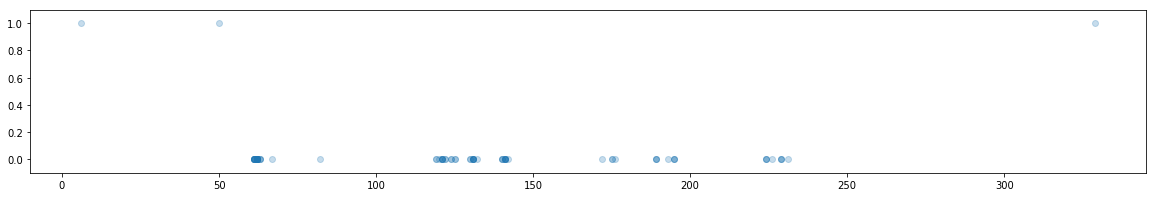

In [207]:
plt.figure(figsize=(20,3))
plt.scatter(df_ppl_ppl_170985['Past days'], df_ppl_ppl_170985.outcome, alpha = 0.25)
plt.ylim(-0.1,1.1)
plt.show

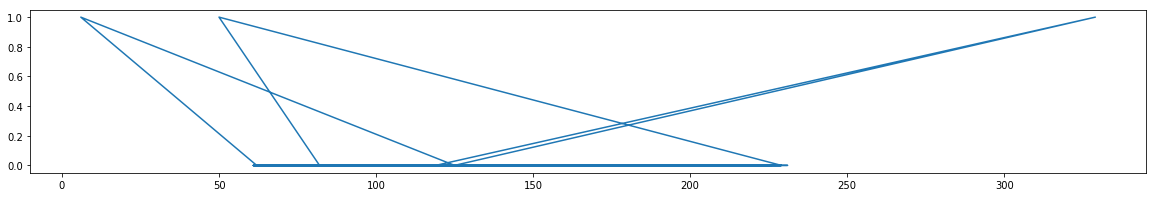

In [209]:
plt.figure(figsize=(20,3))
plt.plot(df_ppl_ppl_170985['Past days'], df_ppl_ppl_170985.outcome)
plt.show()

<function matplotlib.pyplot.show>

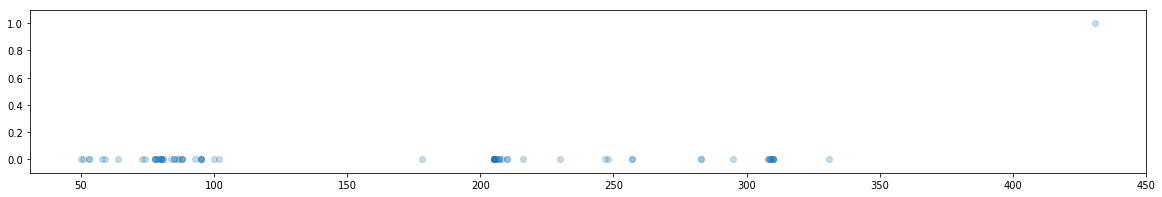

In [205]:
plt.figure(figsize=(20,3))
plt.scatter(df_ppl_ppl_384571['Past days'], df_ppl_ppl_384571.outcome, alpha = 0.25)
plt.ylim(-0.1,1.1)
plt.show

In [25]:
df_sample = df_merge.sample(frac = 0.1, random_state=0).copy()

In [34]:
df_sample.groupby(['activity_id', 'activity_category']).count()

people_id  date_x  week_x  Past days  char_1_x  \
activity_id activity_category                                                   
1           1                      15813   15813   15813      15813     15813   
2           2                      90498   90498   90498      90498         0   
            3                      42804   42804   42804      42804         0   
            4                      20891   20891   20891      20891         0   
            5                      48968   48968   48968      48968         0   
            6                        429     429     429        429         0   
            7                        326     326     326        326         0   

                               char_2_x  char_3_x  char_4_x  char_5_x  \
activity_id activity_category                                           
1           1                     15813     15813     15813     15813   
2           2                         0         0         0         0   
            3                         0         0         0         0   
            4                         0         0         0         0   
            5                         0         0         0         0   
            6                         0         0         0         0   
            7                         0         0         0         0   

                               char_6_x  char_7_x  char_8_x  char_9_x  \
activity_id activity_category                                           
1           1                     15813     15813     15813     15813   
2           2                         0         0         0         0   
            3                         0         0         0         0   
            4                         0         0         0         0   
            5                         0         0         0         0   
            6                         0         0         0         0   
            7                         0         0         0         0   

                               char_10_x  outcome  char_1_y  group_1  date_y  \
activity_id activity_category                                                  
1           1                          0    15813     15813    15813   15813   
2           2                      90498    90498     90498    90498   90498   
            3                      42804    42804     42804    42804   42804   
            4                      20891    20891     20891    20891   20891   
            5                      48968    48968     48968    48968   48968   
            6                        429      429       429      429     429   
            7                        326      326       326      326     326   

                               week_y  char_2_y  char_3_y  char_4_y  char_5_y  \
activity_id activity_category                                                   
1           1                   15813     15813     15813     15813     15813   
2           2                   90498     90498     90498     90498     90498   
            3                   42804     42804     42804     42804     42804   
            4                   20891     20891     20891     20891     20891   
            5                   48968     48968     48968     48968     48968   
            6                     429       429       429       429       429   
            7                     326       326       326       326       326   

                               char_6_y  char_7_y  char_8_y  char_9_y  \
activity_id activity_category                                           
1           1                     15813     15813     15813     15813   
2           2                     90498     90498     90498     90498   
            3                     42804     42804     42804     42804   
            4                     20891     20891     20891     20891   
            5                     48968     48968     48968     48968   
            6          

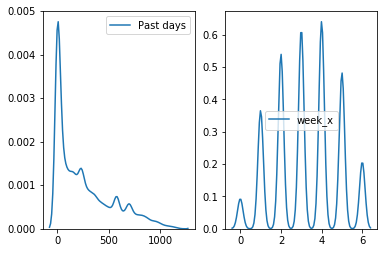

In [60]:
plt.subplot(1,2,1)
sns.kdeplot(df_sample['Past days'])
plt.subplot(1,2,2)
sns.kdeplot(df_sample['week_x'])
plt.show()

#### char_1_x ~ char_9_x

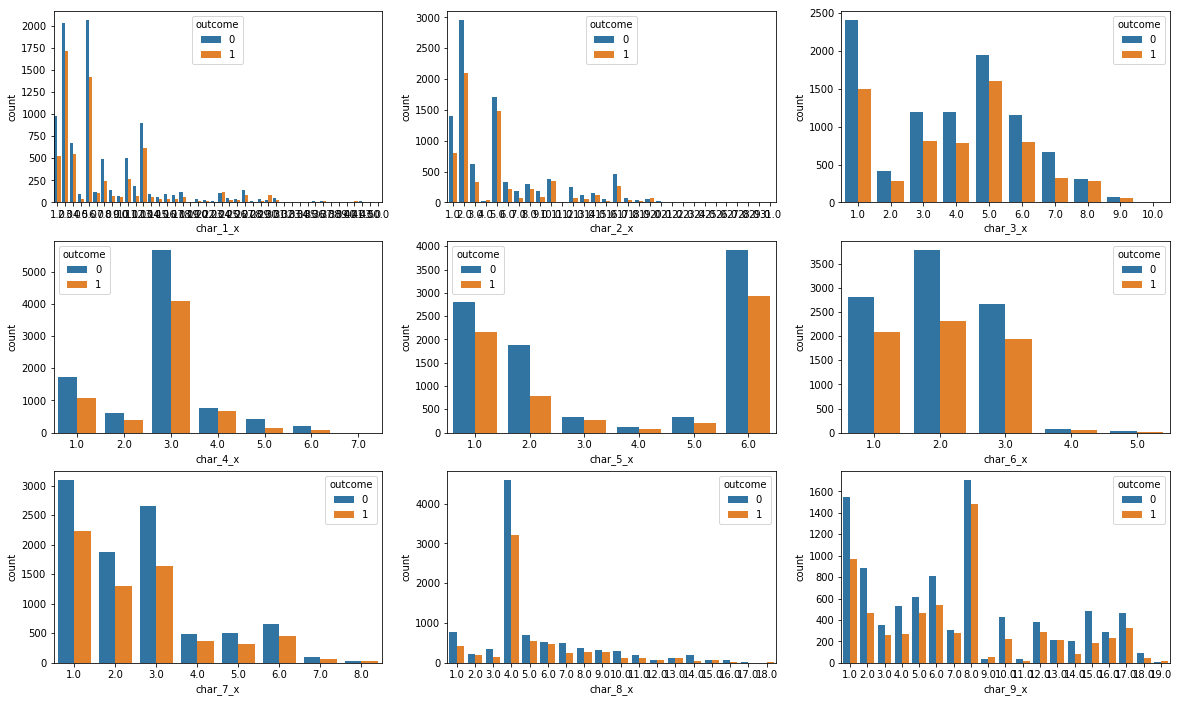

In [132]:
plt.figure(figsize=(20,12))
for i, feat in enumerate(df_sample.columns[6:15]):
    plt.subplot(3,3,i+1)
    sns.countplot(feat, hue='outcome', data=df_sample)
plt.show()

#### char_2_y ~ char_9_y

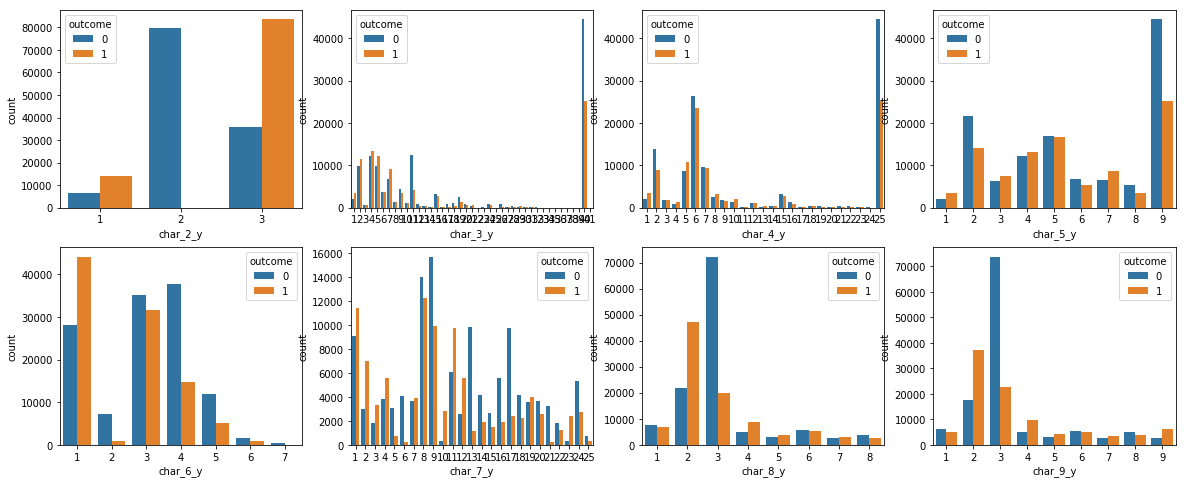

In [123]:
plt.figure(figsize=(20,8))
for i, feat in enumerate(df_sample.columns[-37:-29]):
    plt.subplot(2,4,i+1)
    sns.countplot(feat, hue='outcome', data=df_sample)
plt.show()

#### char_10_y ~ char_37

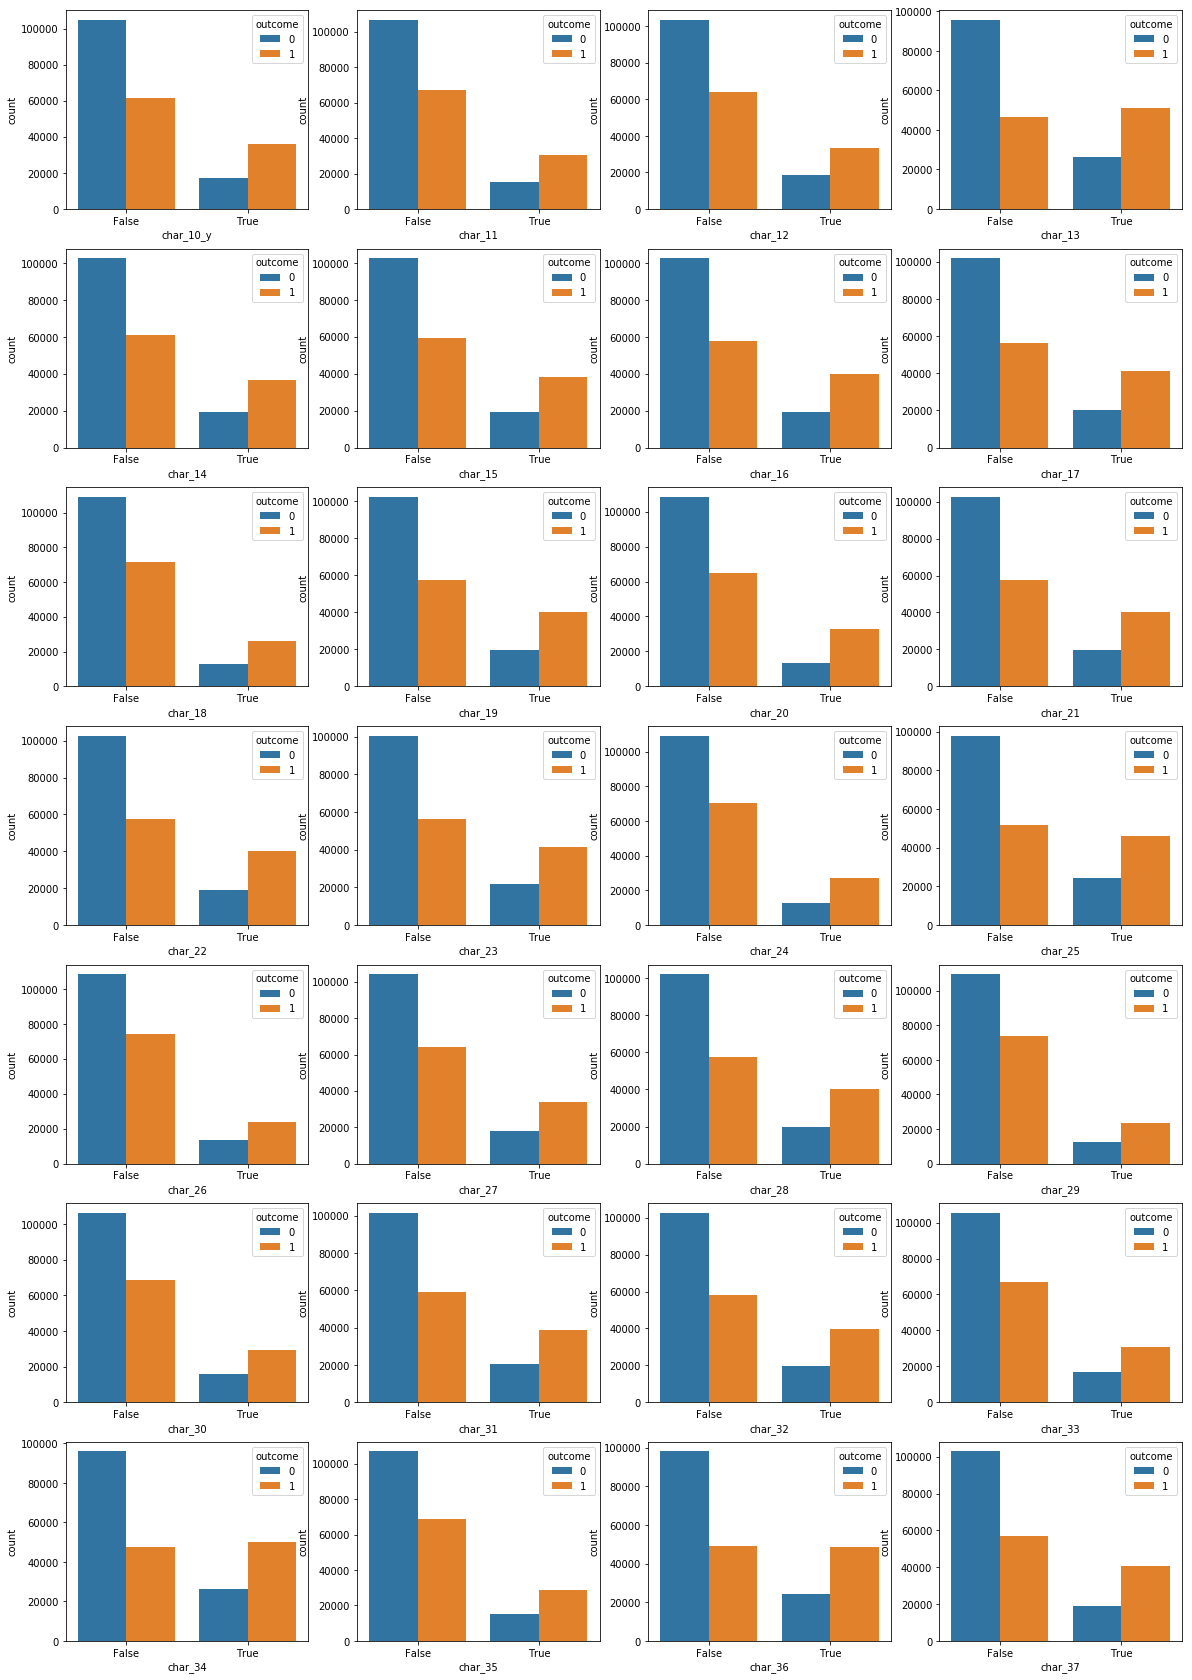

In [82]:
plt.figure(figsize=(20,30))
for i, feat in enumerate(df_sample.columns[-29:-1]):
    plt.subplot(7,4,i+1)
    sns.countplot(feat, hue='outcome', data=df_sample)
plt.show()

#### char_38

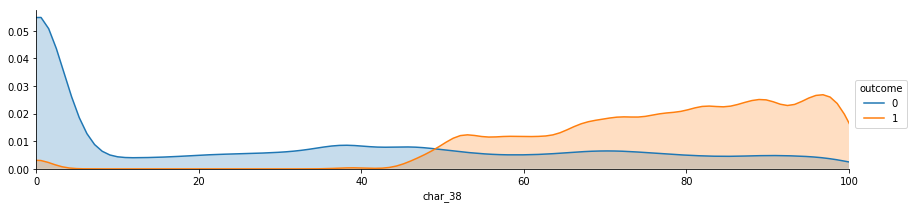

In [143]:
facet = sns.FacetGrid(df_sample, hue='outcome', aspect=4)
facet.map(sns.kdeplot, 'char_38', shade=True)
facet.set(xlim=(0, df_sample['char_38'].max()))
facet.add_legend()

plt.show()

# feature selection

# modeling

In [ ]:
df_tree = df_sample[['activity_category', 'date_x', 'char_38', 'char_1_y', 'char_2_y','outcome']].copy()

In [ ]:
import io
import pydot
from IPython.core.display import Image 
from sklearn.tree import export_graphviz

def draw_decision_tree(model):
    dot_buf = io.StringIO() 
    export_graphviz(model, out_file=dot_buf, feature_names=['activity_category', 'char_38', 'char_1_y', 'char_2_y'])
    graph = pydot.graph_from_dot_data(dot_buf.getvalue())[0] 
    image = graph.create_png()
    return Image(image)

In [ ]:
df_tree_X = df_sample[['activity_category', 'date_x', 'char_1_y', 'char_2_y','char_38']].copy()
df_tree_y = df_sample['outcome'].copy()

In [ ]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(criterion='entropy', max_depth=5).fit(df_tree_X, df_tree_y)

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(df_tree_y, tree.predict(df_tree_X))